In [1]:
! pip install matplotlib seaborn pandas

Your user’s .npmrc file (${HOME}/.npmrc)
has a `globalconfig` and/or a `prefix` setting, which are incompatible with nvm.
Run `nvm use --delete-prefix v24.4.0 --silent` to unset it.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


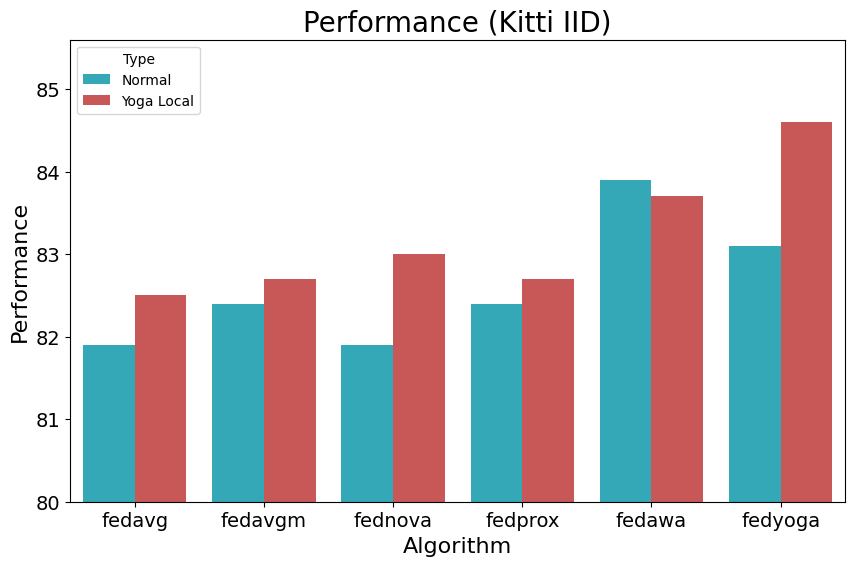

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

algorithms = ["fedavg", "fedavgm", "fednova", "fedprox", "fedawa", "fedyoga"]
normal = [81.9, 82.4, 81.9, 82.4, 83.9, 83.1]
yoga_local_train = [82.5, 82.7, 83, 82.7, 83.7, 84.6]

data = {
    "Algorithm": algorithms * 2,
    "Performance": normal + yoga_local_train,
    "Type": ["Normal"] * len(algorithms) + ["Yoga Local"] * len(algorithms)
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

plt.title('Performance (Kitti IID)', fontsize=20)
plt.xlabel('Algorithm', fontsize=16)
plt.ylabel('Performance', fontsize=16)
plt.tick_params(axis='both', labelsize=14)  # 這行要加在 plt.legend 之前


sns.barplot(
    x="Algorithm", y="Performance", 
    hue="Type", data=df, 
    palette=["#1FB8CD", "#DB4545"], 
    errorbar=None)

plt.ylim(80, max(max(normal), max(yoga_local_train)) + 1)
plt.xlabel('Algorithm')
plt.ylabel('Performance')

plt.legend(title='Type', loc='upper left')
# type說明放左上角

plt.show()


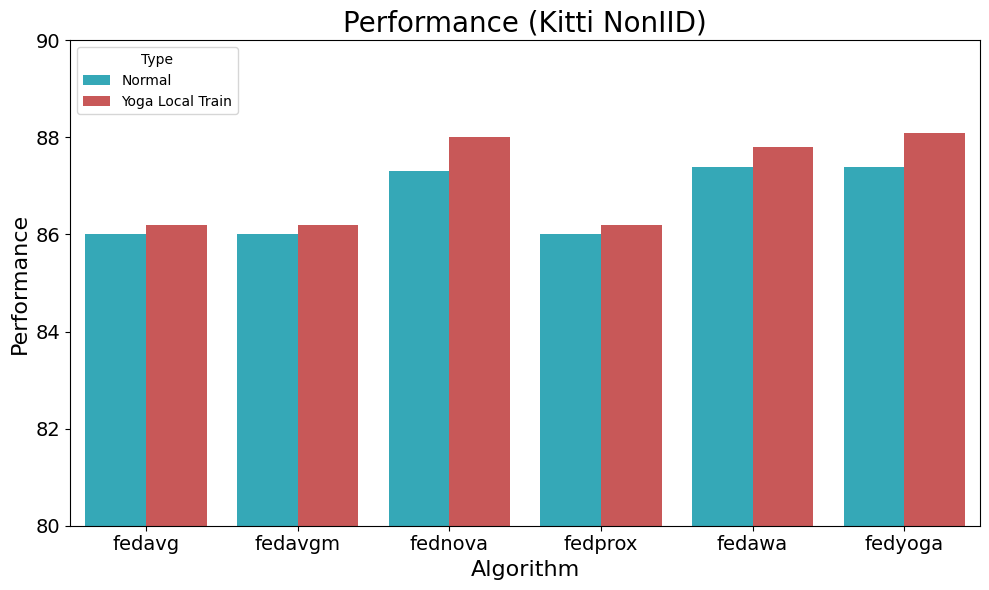

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 資料
algorithms = ["fedavg", "fedavgm", "fednova", "fedprox", "fedawa", "fedyoga"]
normal = [86, 86, 87.3, 86, 87.4, 87.4]
yoga_local_train = [86.2, 86.2, 88, 86.2, 87.8, 88.1]

data = {
    "Algorithm": algorithms * 2,
    "Performance": normal + yoga_local_train,
    "Type": ["Normal"] * len(algorithms) + ["Yoga Local Train"] * len(algorithms)
}
df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6)) # plot width=600px, height=400px

sns.barplot(
    x="Algorithm", y="Performance",
    hue="Type", data=df,
    palette=["#1FB8CD", "#DB4545"],
    errorbar=None, ax=ax
)

ax.set_title('Performance (Kitti NonIID)', fontsize=20)
ax.set_xlabel('Algorithm', fontsize=16)
ax.set_ylabel('Performance', fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_ylim(80, 90)

# legend 橫向、上方不擋標題
plt.legend(title='Type', loc='upper left')
fig.tight_layout()
plt.show()


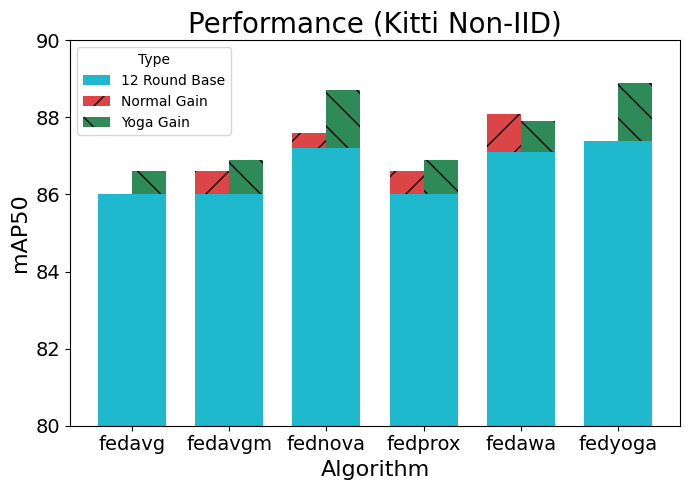

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    "algorithm": ["fedavg", "fedavgm", "fednova", "fedprox", "fedawa", "fedyoga"],
    "base_mAP50": [86, 86, 87.2, 86, 87.1, 87.4],
    "normal_gain": [0, 0.6, 0.4, 0.6, 1, 0],
    "yoga_gain": [0.6, 0.9, 1.5, 0.9, 0.8, 1.5]
}
df = pd.DataFrame(data)

bar_width = 0.35
x = np.arange(len(df))

fig, ax = plt.subplots(figsize=(7, 5))

# Normal group (左邊)
ax.bar(x - bar_width/2, df['base_mAP50'], width=bar_width, label="12 Round Base", color="#1FB8CD")
ax.bar(x - bar_width/2, df['normal_gain'], width=bar_width, bottom=df['base_mAP50'], label="Normal Gain", color="#DB4545", hatch='/')

# Yoga group (右邊)
ax.bar(x + bar_width/2, df['base_mAP50'], width=bar_width, label=None, color="#1FB8CD")  # base右，不重複legend
ax.bar(x + bar_width/2, df['yoga_gain'], width=bar_width, bottom=df['base_mAP50'], label="Yoga Gain", color="#2E8B57", hatch='\\')

# x軸
ax.set_xticks(x)
ax.set_xticklabels(df['algorithm'], fontsize=14)
ax.set_xlabel('Algorithm', fontsize=16)
ax.set_ylabel('mAP50', fontsize=16)
ax.set_title('Performance (Kitti Non-IID)', fontsize=20)
ax.set_ylim([80, 90])
ax.tick_params(axis='y', labelsize=14)

# legend 水平顯示
ax.legend(title='Type', loc='upper left')

fig.tight_layout()
plt.show()



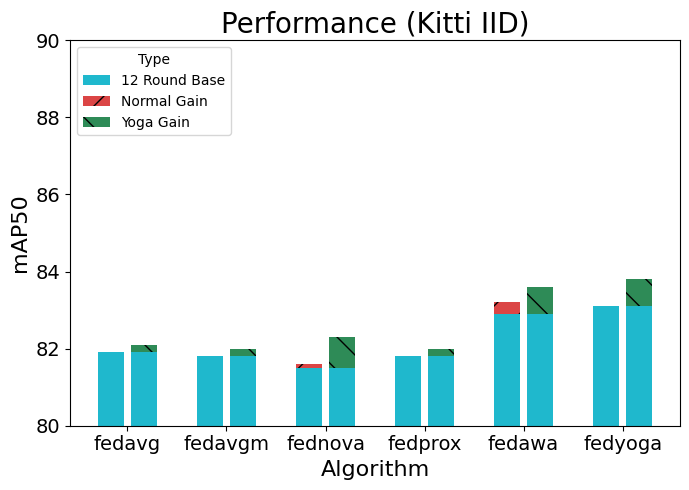

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 資料
data = {
    "algorithm": ["fedavg", "fedavgm", "fednova", "fedprox", "fedawa", "fedyoga"],
    "base_mAP50": [81.9, 81.8, 81.5, 81.8, 82.9, 83.1],
    "normal_gain": [0, 0, 0.1, 0, 0.3, 0],
    "yoga_gain": [0.2, 0.2, 0.8, 0.2, 0.7, 0.7]
}
df = pd.DataFrame(data)

n_alg = len(df)
bar_width = 0.8
group_gap = 3  # 與 plotly 等效，每組隔3
x_positions_normal = np.arange(n_alg) * group_gap
x_positions_yoga = np.arange(n_alg) * group_gap + 1

fig, ax = plt.subplots(figsize=(7, 5))

# Normal group (左)
bars_base_normal = ax.bar(x_positions_normal, df['base_mAP50'], width=bar_width, color='#1FB8CD', label='12 Round Base')
bars_gain_normal = ax.bar(x_positions_normal, df['normal_gain'], width=bar_width, bottom=df['base_mAP50'],
                         color='#DB4545', label='Normal Gain', hatch='/')

# Yoga group (右)
bars_base_yoga = ax.bar(x_positions_yoga, df['base_mAP50'], width=bar_width, color='#1FB8CD', label=None)
bars_gain_yoga = ax.bar(x_positions_yoga, df['yoga_gain'], width=bar_width, bottom=df['base_mAP50'],
                        color='#2E8B57', label='Yoga Gain', hatch='\\')

# 刻度與label x軸
tickvals = np.arange(n_alg) * group_gap + 0.5
ax.set_xticks(tickvals)
ax.set_xticklabels(df['algorithm'], fontsize=14)

# 標題、軸
ax.set_title('Performance (Kitti IID)', fontsize=20)
ax.set_xlabel('Algorithm', fontsize=16)
ax.set_ylabel('mAP50', fontsize=16)
ax.set_ylim([80, 90])
ax.tick_params(axis='y', labelsize=14)

# legend水平排列
ax.legend(title='Type', loc='upper left')

fig.tight_layout()

plt.show()



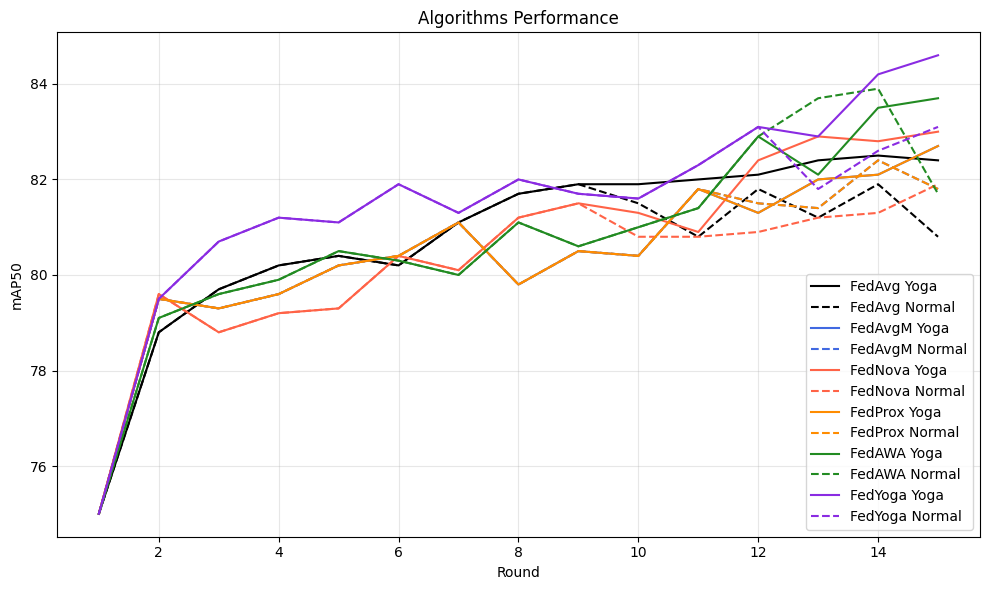

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# data
rounds = np.arange(1, 16)
data = {
    'fedavg': {
        'normal': [75,78.8,79.7,80.2,80.4,80.2,81.1,81.7,81.9,81.5,80.8,81.8,81.2,81.9,80.8],
        'yoga': [75,78.8,79.7,80.2,80.4,80.2,81.1,81.7,81.9,81.9,82,82.1,82.4,82.5,82.4],
    },
    'fedavgm': {
        'normal': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.5,81.4,82.4,81.8],
        'yoga': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.3,82,82.1,82.7],
    },
    'fednova': {
        'normal': [75,79.6,78.8,79.2,79.3,80.4,80.1,81.2,81.5,80.8,80.8,80.9,81.2,81.3,81.9],
        'yoga': [75,79.6,78.8,79.2,79.3,80.4,80.1,81.2,81.5,81.3,80.9,82.4,82.9,82.8,83],
    },
    'fedprox': {
        'normal': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.5,81.4,82.4,81.8],
        'yoga': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.3,82,82.1,82.7],
    },
    'fedawa': {
        'normal': [75,79.1,79.6,79.9,80.5,80.3,80,81.1,80.6,81,81.4,82.9,83.7,83.9,81.7],
        'yoga': [75,79.1,79.6,79.9,80.5,80.3,80,81.1,80.6,81,81.4,82.9,82.1,83.5,83.7],
    },
    'fedyoga': {
        'normal': [75,79.5,80.7,81.2,81.1,81.9,81.3,82,81.7,81.6,82.3,83.1,81.8,82.6,83.1],
        'yoga': [75,79.5,80.7,81.2,81.1,81.9,81.3,82,81.7,81.6,82.3,83.1,82.9,84.2,84.6],
    },
}

colors = ['black', 'royalblue', 'tomato', 'darkorange', 'forestgreen', 'blueviolet']
labels = ['FedAvg', 'FedAvgM', 'FedNova', 'FedProx', 'FedAWA', 'FedYoga']

plt.figure(figsize=(10, 6))
for idx, key in enumerate(data):
    plt.plot(rounds, data[key]['yoga'], label=labels[idx]+' Yoga', color=colors[idx], linestyle='-')
    plt.plot(rounds, data[key]['normal'], label=labels[idx]+' Normal', color=colors[idx], linestyle='--')
plt.xlabel('Round')
plt.ylabel('mAP50')
plt.title('Algorithms Performance')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

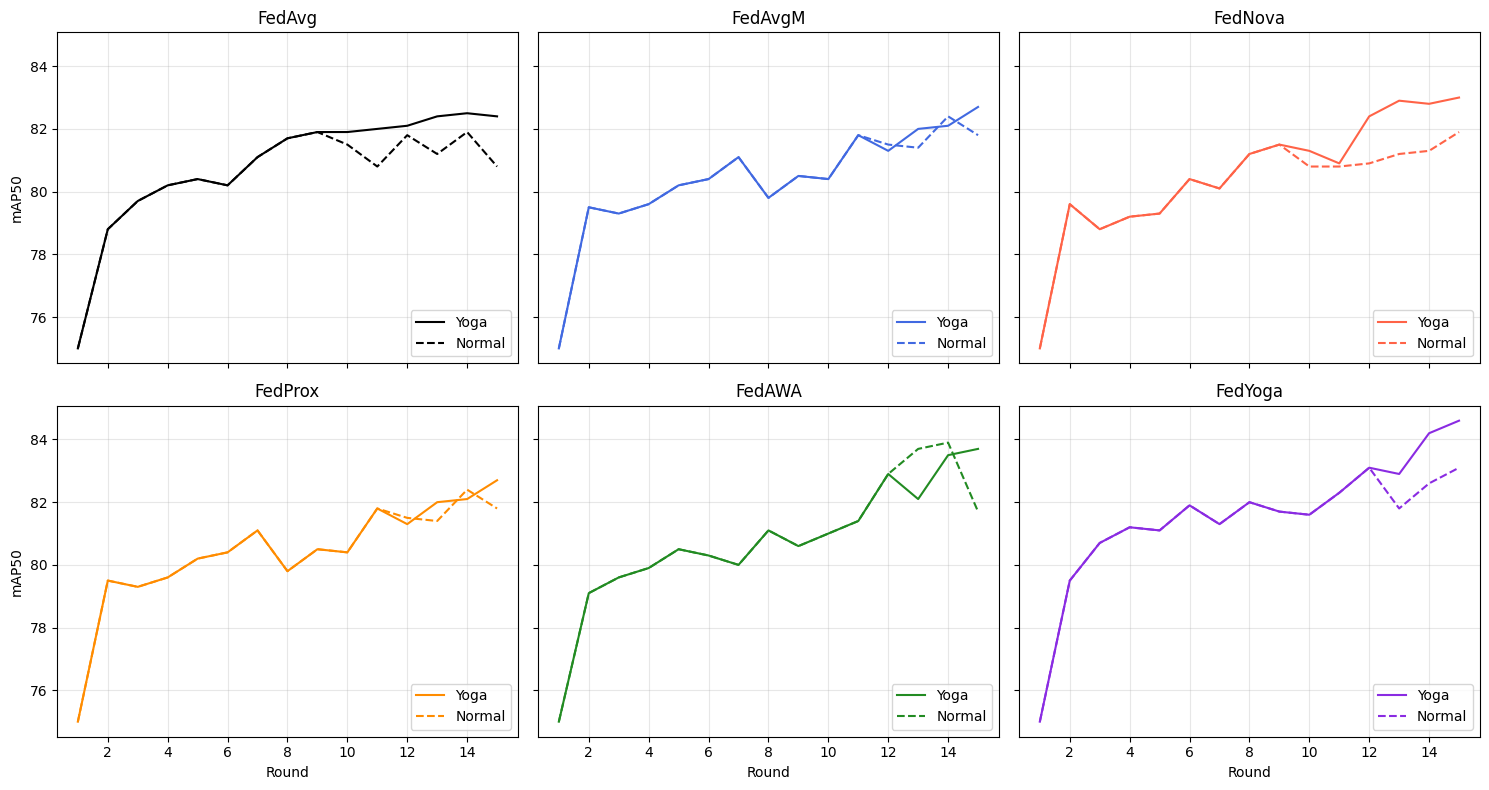

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rounds = np.arange(1, 16)
data = {
    'FedAvg': {
        'normal': [75,78.8,79.7,80.2,80.4,80.2,81.1,81.7,81.9,81.5,80.8,81.8,81.2,81.9,80.8],
        'yoga': [75,78.8,79.7,80.2,80.4,80.2,81.1,81.7,81.9,81.9,82,82.1,82.4,82.5,82.4],
        'color': 'black',
    },
    'FedAvgM': {
        'normal': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.5,81.4,82.4,81.8],
        'yoga': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.3,82,82.1,82.7],
        'color': 'royalblue',
    },
    'FedNova': {
        'normal': [75,79.6,78.8,79.2,79.3,80.4,80.1,81.2,81.5,80.8,80.8,80.9,81.2,81.3,81.9],
        'yoga': [75,79.6,78.8,79.2,79.3,80.4,80.1,81.2,81.5,81.3,80.9,82.4,82.9,82.8,83],
        'color': 'tomato',
    },
    'FedProx': {
        'normal': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.5,81.4,82.4,81.8],
        'yoga': [75,79.5,79.3,79.6,80.2,80.4,81.1,79.8,80.5,80.4,81.8,81.3,82,82.1,82.7],
        'color': 'darkorange',
    },
    'FedAWA': {
        'normal': [75,79.1,79.6,79.9,80.5,80.3,80,81.1,80.6,81,81.4,82.9,83.7,83.9,81.7],
        'yoga': [75,79.1,79.6,79.9,80.5,80.3,80,81.1,80.6,81,81.4,82.9,82.1,83.5,83.7],
        'color': 'forestgreen',
    },
    'FedYoga': {
        'normal': [75,79.5,80.7,81.2,81.1,81.9,81.3,82,81.7,81.6,82.3,83.1,81.8,82.6,83.1],
        'yoga': [75,79.5,80.7,81.2,81.1,81.9,81.3,82,81.7,81.6,82.3,83.1,82.9,84.2,84.6],
        'color': 'blueviolet',
    },
}

fig, axs = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
axs = axs.flatten()
for idx, (name, val) in enumerate(data.items()):
    ax = axs[idx]
    ax.plot(rounds, val['yoga'], label='Yoga', color=val['color'], linestyle='-')
    ax.plot(rounds, val['normal'], label='Normal', color=val['color'], linestyle='--')
    ax.set_title(name)
    ax.grid(True, alpha=0.3)
    if idx % 3 == 0:
        ax.set_ylabel('mAP50')
    if idx >= 3:
        ax.set_xlabel('Round')
    ax.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()


In [21]:
import wandb
import pandas as pd

# 初始化 API
api = wandb.Api()
# workspace 專案資訊
entity = "nchc"  # 組織/使用者名稱
project = "49_kittiO_fedavg_4C_12R_202511041134"  # 專案名稱

# 列出所有 runs
runs = api.runs(f"{entity}/{project}")

# 收集結果
_data = []
for _run in runs:
    # 取得 run 的 metric history（可以加 max_steps 控制效率）
    history = _run.history(keys=["metrics/mAP_0.5", "metrics/mAP_0.5:0.95", "train/box_loss", "_step"])
    if len(history) > 0:
        latest = history.iloc[-1]
        _data.append({
            "run_id": _run.id,
            "run_name": _run.name,
            "metrics/mAP_0.5": latest.get("metrics/mAP_0.5", None),
            "metrics/mAP_0.5:0.95": latest.get("metrics/mAP_0.5:0.95", None),
            "train/box_loss": latest.get("train/box_loss", None),
            "_step": latest.get("_step", None)
        })
    else:
        _data.append({
            "run_id": _run.id,
            "run_name": _run.name,
            "metrics/mAP_0.5": None,
            "metrics/mAP_0.5:0.95": None,
            "train/box_loss": None,
            "_step": None
        })

df = pd.DataFrame(_data)
print(df)

      run_id run_name  metrics/mAP_0.5  metrics/mAP_0.5:0.95  train/box_loss  \
0   aioraopf    r1_c1         0.764398              0.488667        1.304259   
1   5mmfj2sb    r1_c2         0.727055              0.470701        1.291638   
2   n7ytlqjx    r1_c3         0.744686              0.491523        1.319457   
3   60a0317z    r1_c4         0.724062              0.471773        1.306254   
4   p3luod0c    r2_c1         0.806873              0.535894        1.219796   
5   qluidldd    r2_c2         0.780834              0.510442        1.208107   
6   i09mpl4r    r2_c3         0.799181              0.530758        1.249752   
7   ltqe4iye    r2_c4         0.770660              0.507546        1.231786   
8   bp55ikju    r3_c1         0.822185              0.559164        1.187937   
9   oalsyz8g    r3_c2         0.810801              0.528001        1.187322   
10  ct0edgpl    r3_c3         0.805720              0.542670        1.196000   
11  n3t3wv46    r3_c4         0.796716  

In [22]:
import wandb
import pandas as pd

api = wandb.Api()
entity = "nchc"
project = "49_kittiO_fedavg_4C_12R_202511041134"

runs = api.runs(f"{entity}/{project}")

all_data = []
for _run in runs:
    # 抓全部 step 的紀錄
    history = _run.history(keys=["metrics/mAP_0.5", "metrics/mAP_0.5:0.95", "train/box_loss", "_step"])
    for _, row in history.iterrows():
        all_data.append({
            "run_id": _run.id,
            "run_name": _run.name,
            "_step": row.get("_step", None),
            "metrics/mAP_0.5": row.get("metrics/mAP_0.5", None),
            "metrics/mAP_0.5:0.95": row.get("metrics/mAP_0.5:0.95", None),
            "train/box_loss": row.get("train/box_loss", None)
        })

df = pd.DataFrame(all_data)
print(df)



       run_id run_name  _step  metrics/mAP_0.5  metrics/mAP_0.5:0.95  \
0    aioraopf    r1_c1    0.0         0.515214              0.311833   
1    aioraopf    r1_c1    1.0         0.566911              0.342500   
2    aioraopf    r1_c1    2.0         0.523878              0.301192   
3    aioraopf    r1_c1    3.0         0.558052              0.320977   
4    aioraopf    r1_c1    4.0         0.565267              0.332707   
..        ...      ...    ...              ...                   ...   
595  ob6y1ylr   r15_c4    5.0         0.711761              0.445774   
596  ob6y1ylr   r15_c4    6.0         0.726727              0.460832   
597  ob6y1ylr   r15_c4    7.0         0.741785              0.476459   
598  ob6y1ylr   r15_c4    8.0         0.773327              0.500618   
599  ob6y1ylr   r15_c4    9.0         0.782976              0.522583   

     train/box_loss  
0          1.725516  
1          1.526915  
2          1.520640  
3          1.537815  
4          1.538026  
.. 

In [23]:
df

,run_id,run_name,_step,metrics/mAP_0.5,metrics/mAP_0.5:0.95,train/box_loss
0,aioraopf,r1_c1,0.0,0.515214,0.311833,1.725516
1,aioraopf,r1_c1,1.0,0.566911,0.342500,1.526915
2,aioraopf,r1_c1,2.0,0.523878,0.301192,1.520640
3,aioraopf,r1_c1,3.0,0.558052,0.320977,1.537815
4,aioraopf,r1_c1,4.0,0.565267,0.332707,1.538026
...,...,...,...,...,...,...
595,ob6y1ylr,r15_c4,5.0,0.711761,0.445774,1.337713
596,ob6y1ylr,r15_c4,6.0,0.726727,0.460832,1.293615
597,ob6y1ylr,r15_c4,7.0,0.741785,0.476459,1.246124
598,ob6y1ylr,r15_c4,8.0,0.773327,0.500618,1.221846


In [24]:
import pandas as pd

# 假設你的 df 裡有 'run_name', '_step', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'train/box_loss'

# Step1. 拆 run_name，取得 round/client 欄位
df[['round', 'client']] = df['run_name'].str.extract(r'(r\d+)_(c\d+)')

# Step2. 分組計算平均
avg_df = df.groupby(['round', '_step']).agg(
    mAP_05_avg=('metrics/mAP_0.5', 'mean'),
    mAP_05_95_avg=('metrics/mAP_0.5:0.95', 'mean'),
    box_loss_avg=('train/box_loss', 'mean')
).reset_index()

print(avg_df)


    round  _step  mAP_05_avg  mAP_05_95_avg  box_loss_avg
0      r1    0.0    0.497849       0.299058      1.718950
1      r1    1.0    0.556728       0.328290      1.535607
2      r1    2.0    0.548863       0.320927      1.531065
3      r1    3.0    0.537436       0.315180      1.551826
4      r1    4.0    0.563238       0.335461      1.547390
..    ...    ...         ...            ...           ...
145    r9    5.0    0.739428       0.462961      1.312603
146    r9    6.0    0.768199       0.495139      1.266329
147    r9    7.0    0.785227       0.514528      1.256132
148    r9    8.0    0.800148       0.526264      1.213713
149    r9    9.0    0.823702       0.557294      1.174471

[150 rows x 5 columns]


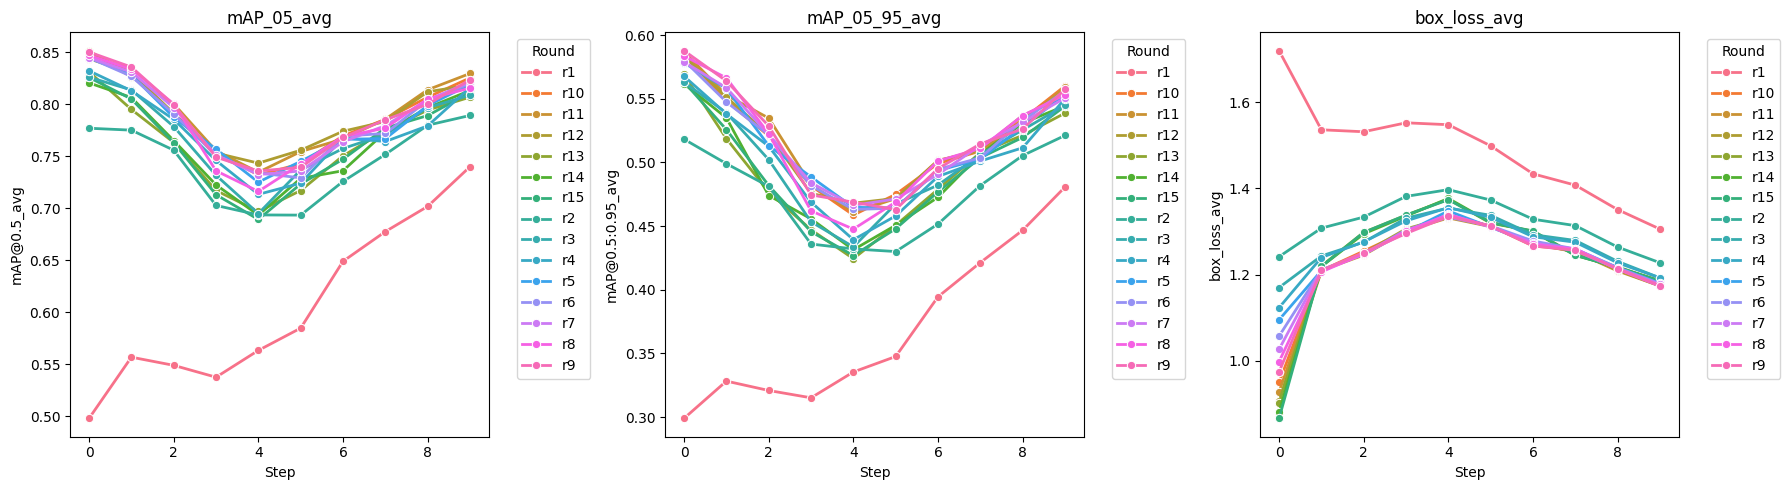

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 avg_df 結構如下：
# round, _step, mAP_05_avg, mAP_05_95_avg, box_loss_avg

plt.figure(figsize=(18, 5))

# mAP_05_avg
plt.subplot(1, 3, 1)
sns.lineplot(data=avg_df, x='_step', y='mAP_05_avg', hue='round', marker='o', linewidth=2)
plt.title('mAP_05_avg')
plt.xlabel('Step')
plt.ylabel('mAP@0.5_avg')
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

# mAP_05_95_avg
plt.subplot(1, 3, 2)
sns.lineplot(data=avg_df, x='_step', y='mAP_05_95_avg', hue='round', marker='o', linewidth=2)
plt.title('mAP_05_95_avg')
plt.xlabel('Step')
plt.ylabel('mAP@0.5:0.95_avg')
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

# box_loss_avg
plt.subplot(1, 3, 3)
sns.lineplot(data=avg_df, x='_step', y='box_loss_avg', hue='round', marker='o', linewidth=2)
plt.title('box_loss_avg')
plt.xlabel('Step')
plt.ylabel('box_loss_avg')
plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


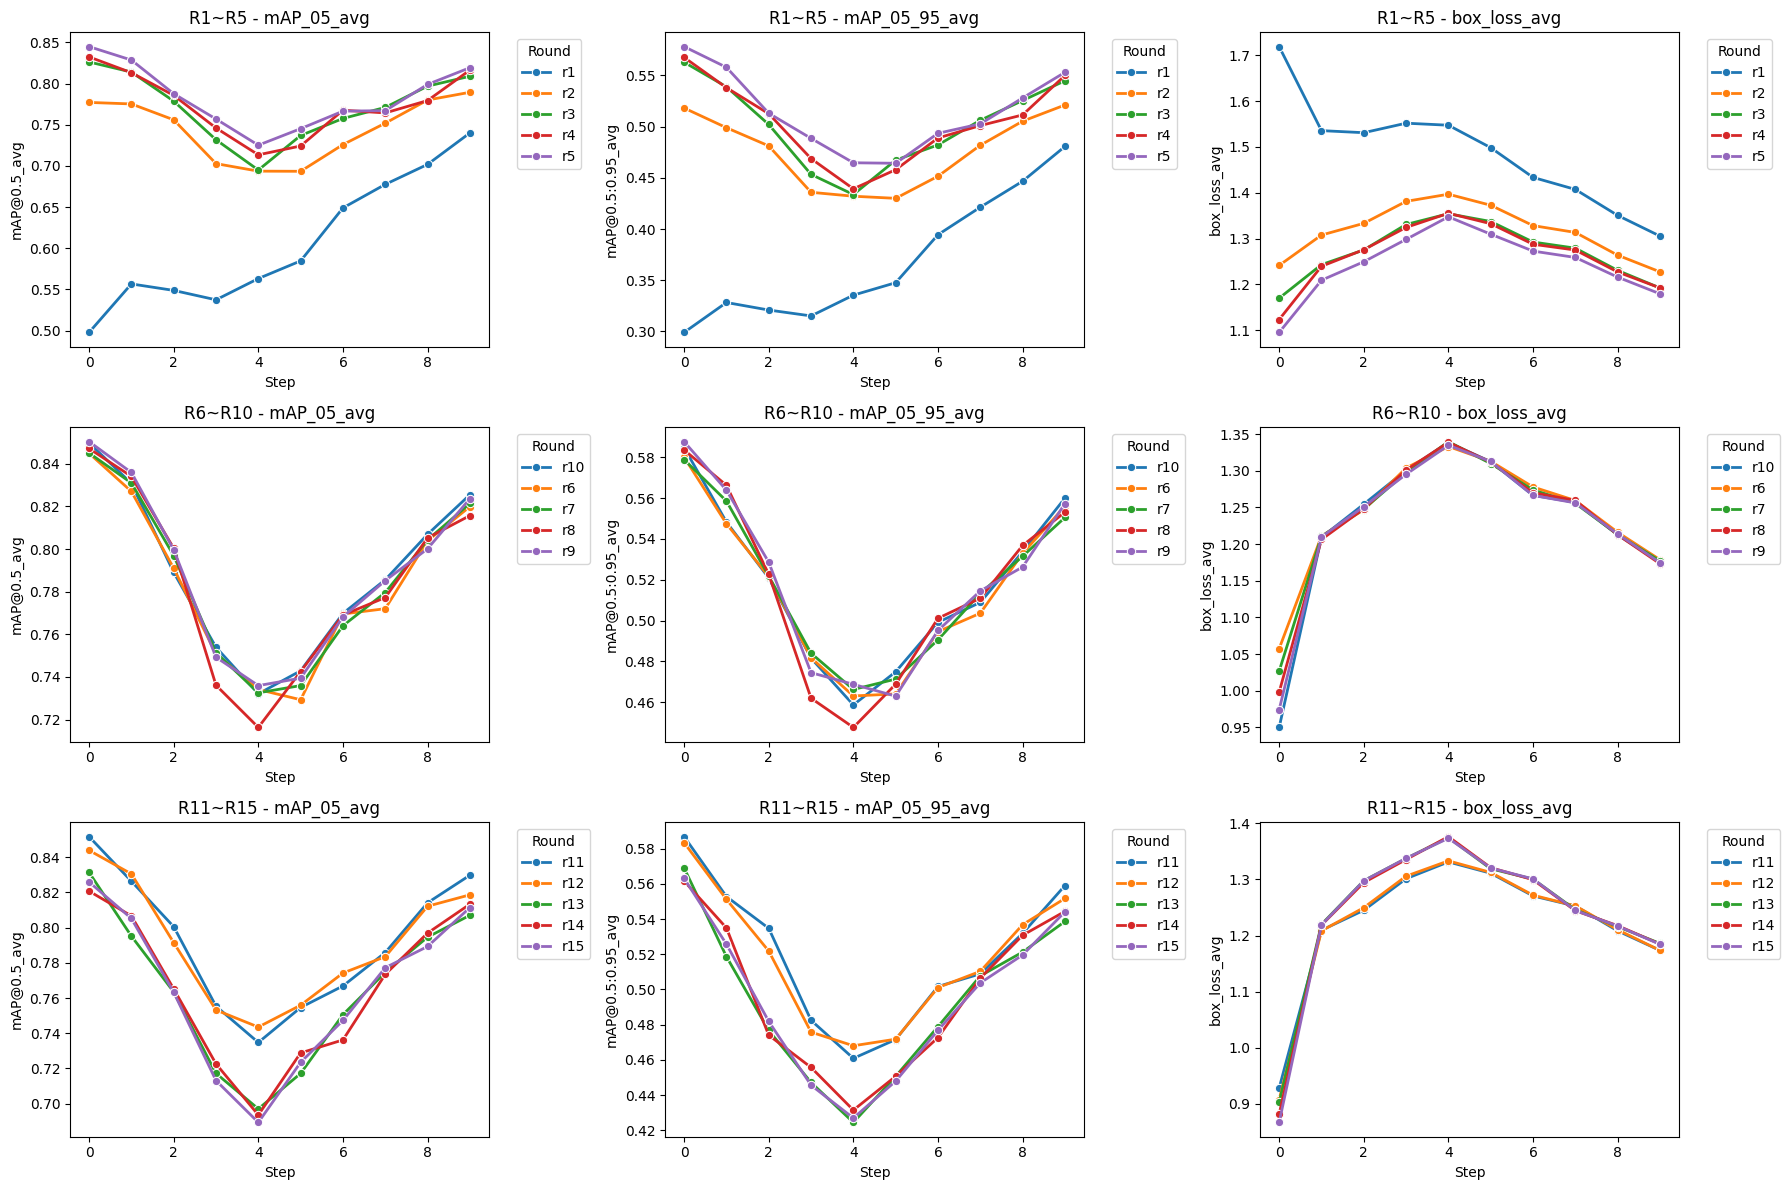

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 分三個 round group
round_groups = [
    ['r1','r2','r3','r4','r5'],
    ['r6','r7','r8','r9','r10'],
    ['r11','r12','r13','r14','r15']
]
titles = ['mAP_05_avg', 'mAP_05_95_avg', 'box_loss_avg']
ylabels = ['mAP@0.5_avg', 'mAP@0.5:0.95_avg', 'box_loss_avg']

plt.figure(figsize=(18, 12))

for i, rounds in enumerate(round_groups):
    for j, (col, ylabel) in enumerate(zip(titles, ylabels)):
        plt.subplot(3, 3, i*3 + j + 1)
        # 過濾指定 rounds
        subset = avg_df[avg_df['round'].isin(rounds)]
        sns.lineplot(data=subset, x='_step', y=col, hue='round', marker='o', linewidth=2)
        plt.title(f'{"R"+str(i*5+1)}~R{str(i*5+5)} - {col}')
        plt.xlabel('Step')
        plt.ylabel(ylabel)
        plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [35]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def draw_fl_trend_chart(entity, project):
    api = wandb.Api()
    runs = api.runs(f"{entity}/{project}")
    
    # Step1. Collect all run step metrics
    all_data = []
    for _run in runs:
        # keys可客製化
        history = _run.history(keys=["metrics/mAP_0.5", "metrics/mAP_0.5:0.95", "train/box_loss", "_step"])
        if hasattr(_run, 'name'):
            if history is not None:
                for _, row in history.iterrows():
                    all_data.append({
                        "run_id": _run.id,
                        "run_name": _run.name,
                        "metrics/mAP_0.5": row.get("metrics/mAP_0.5", None),
                        "metrics/mAP_0.5:0.95": row.get("metrics/mAP_0.5:0.95", None),
                        "train/box_loss": row.get("train/box_loss", None),
                        "_step": row.get("_step", None)
                    })
    df = pd.DataFrame(all_data)
    
    # Step2. Extract round, client from run_name
    df[['round', 'client']] = df['run_name'].str.extract(r'(r\d+)_(c\d+)')
    
    # Step3. Group by round, step, compute avg
    avg_df = df.groupby(['round', '_step']).agg(
        mAP_05_avg=('metrics/mAP_0.5', 'mean'),
        mAP_05_95_avg=('metrics/mAP_0.5:0.95', 'mean'),
        box_loss_avg=('train/box_loss', 'mean')
    ).reset_index()
    
    # Step4. Round分組、子圖繪製
    round_groups = [
        [f'r{i}' for i in range(1,6)],
        [f'r{i}' for i in range(6,11)],
        [f'r{i}' for i in range(11,16)]
    ]
    titles = ['mAP_05_avg', 'mAP_05_95_avg', 'box_loss_avg']
    ylabels = ['mAP@0.5_avg', 'mAP@0.5:0.95_avg', 'box_loss_avg']
    
    plt.figure(figsize=(18, 12))
    for i, rounds in enumerate(round_groups):
        for j, (col, ylabel) in enumerate(zip(titles, ylabels)):
            plt.subplot(3, 3, i*3 + j + 1)
            subset = avg_df[avg_df['round'].isin(rounds)]
            sns.lineplot(data=subset, x='_step', y=col, hue='round', marker='o', linewidth=2)
            plt.title(f'R{1+i*5}~R{(i+1)*5} - {col}')
            plt.xlabel('Step')
            plt.ylabel(ylabel)
            plt.legend(title='Round', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 用法範例：
# draw_fl_trend_chart("nchc", "49_kittiO_fedavg_4C_12R_202511041134")


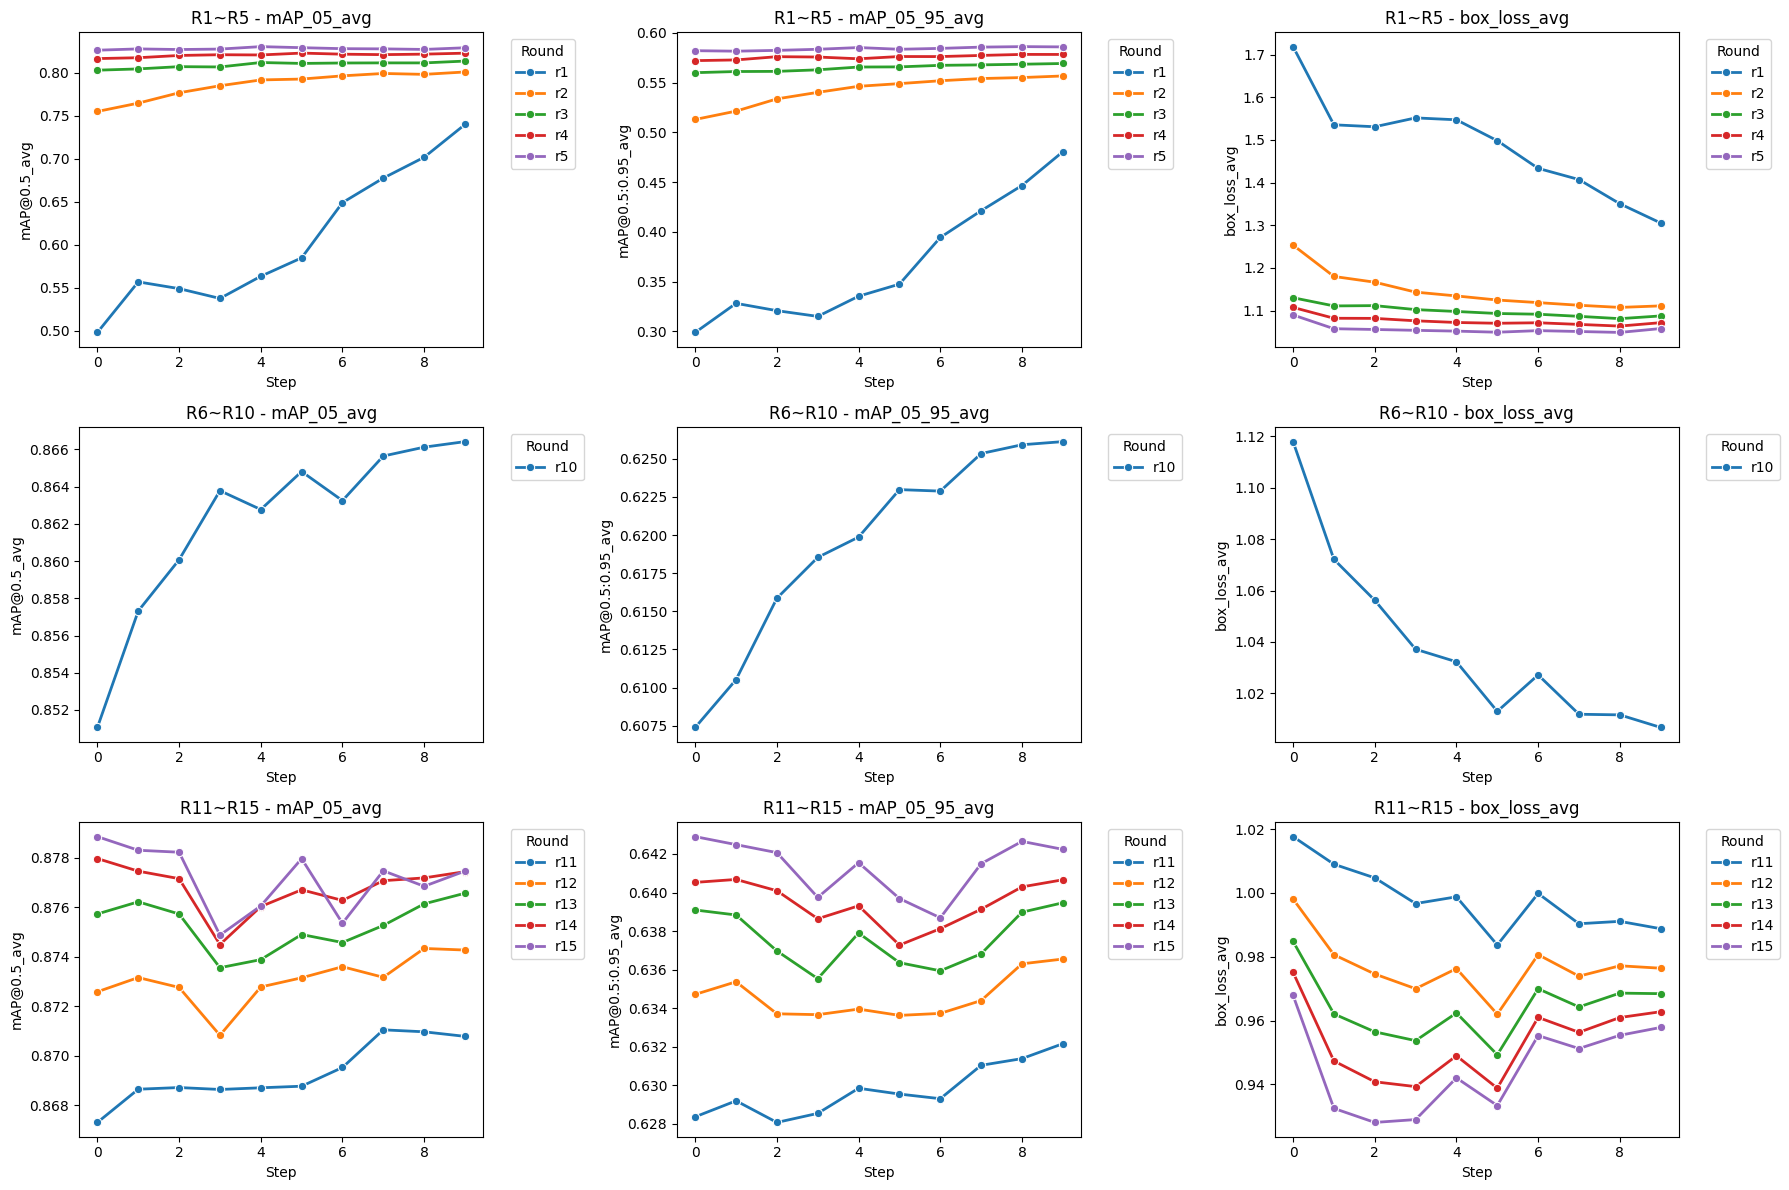

In [39]:
draw_fl_trend_chart("nchc", "21_kittiO_fedavg_4C_5R_202510282248") # 21_kittiO_fedavg_4C_5R_202510282248

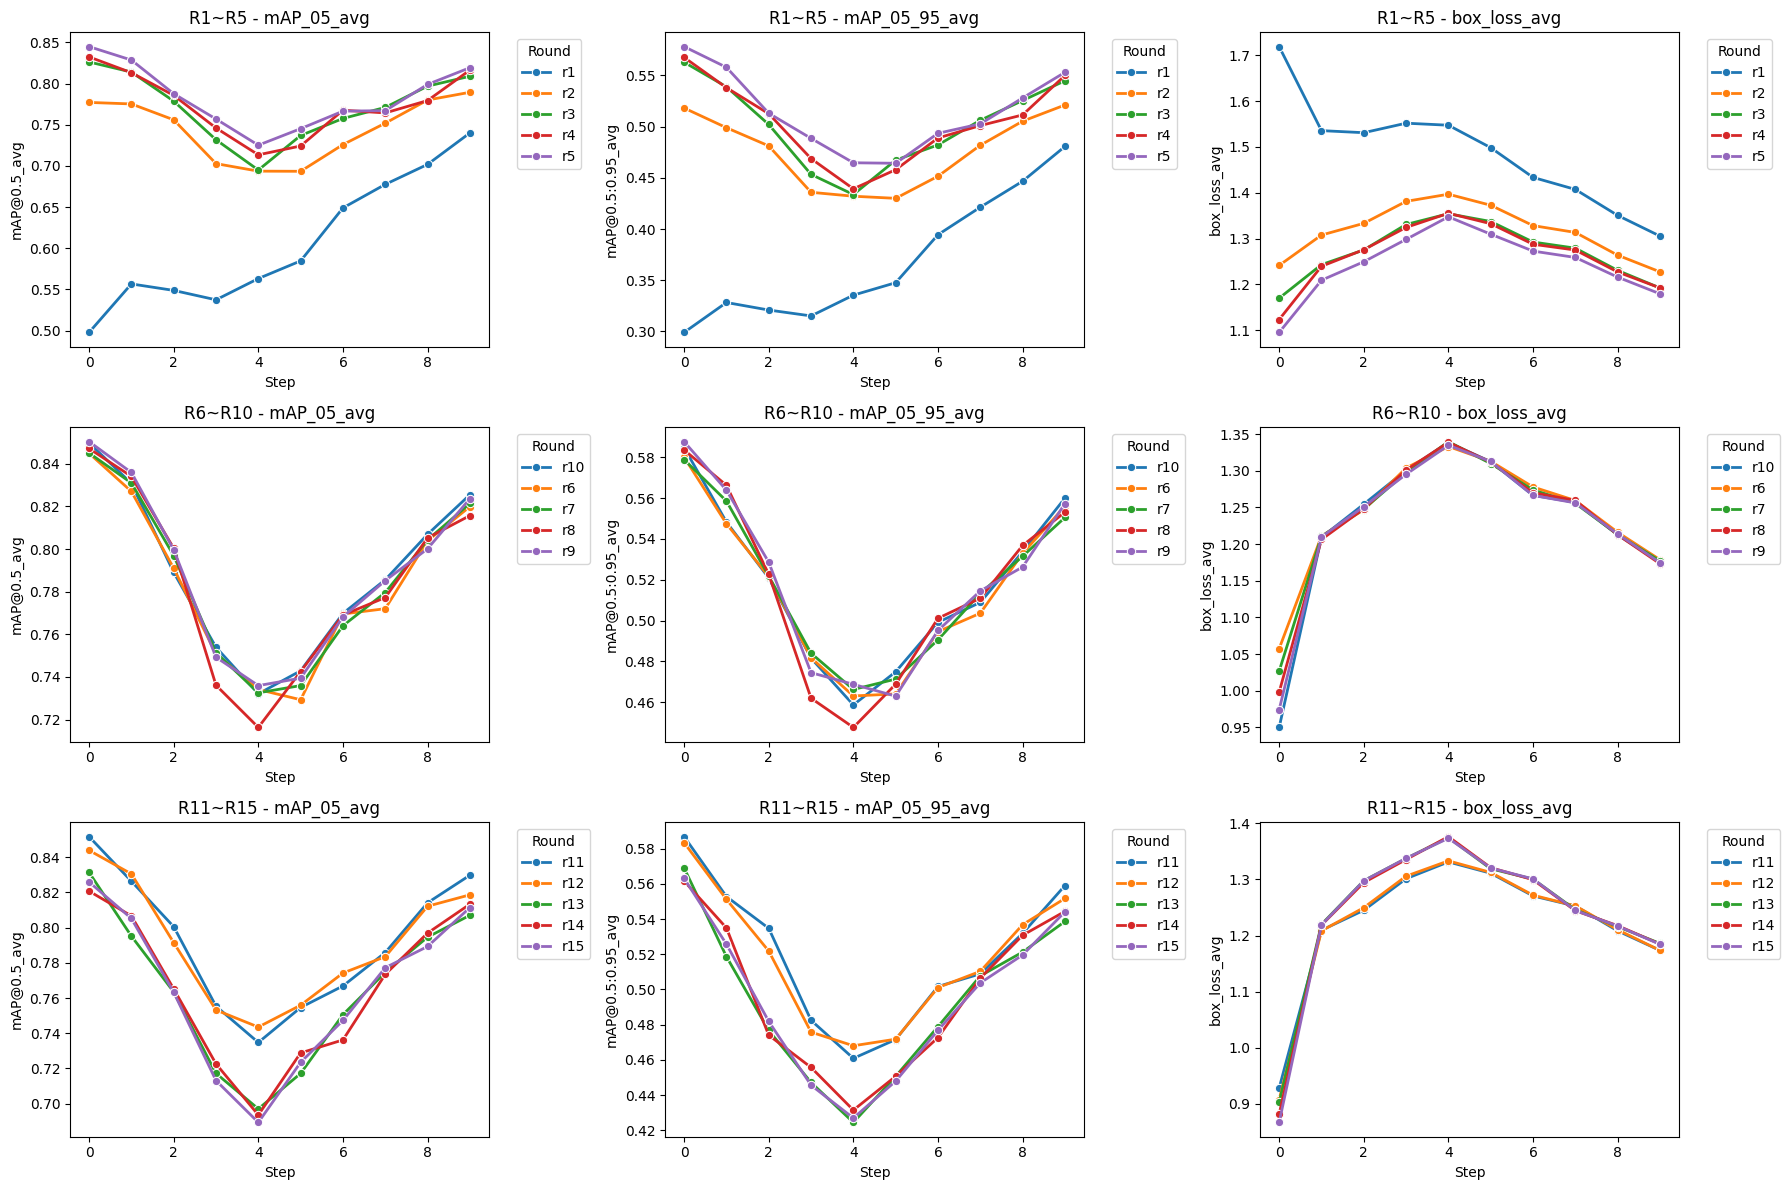

In [40]:
draw_fl_trend_chart("nchc", "49_kittiO_fedavg_4C_12R_202511041134") # 49_kittiO_fedavg_4C_12R_202511041134